In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [57]:
data = pd.read_csv("../data/clean/data.csv")
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents,TotalIncome
0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,6091.0
1,1,1,1,1,3000,0.0,66.0,360.0,1.0,2,1,0,3000.0
2,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0,4941.0
3,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0,6000.0
4,1,1,1,1,5417,4196.0,267.0,360.0,1.0,2,1,2,9613.0


In [58]:
# Split data into features (X) and target (y)
X = data.drop('Loan_Status', axis=1)  # Features
y = data['Loan_Status']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [59]:
print("Training data: ", len(y_train))
print("Testing data: ", len(y_test))

Training data:  360
Testing data:  120


In [60]:
print("Train set Approved loan: ", (y_train == 1).sum())
print("Train set Rejected loan: ", (y_train == 0).sum())
print("Test set Approved loan: ", (y_test == 1).sum())
print("Test set Rejected loan: ", (y_test == 0).sum())

Train set Approved loan:  254
Train set Rejected loan:  106
Test set Approved loan:  78
Test set Rejected loan:  42


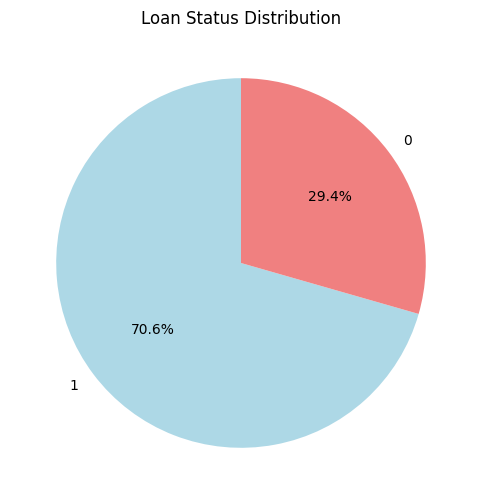

In [61]:
# Count Loan_Status values
loan_status_counts = y_train.value_counts()

# Extract data for the pie chart
labels = loan_status_counts.index  # Categories (Y, N)
sizes = loan_status_counts.values  # Count of each category

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Adjust size of the figure
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Loan Status Distribution')
plt.show()

The dataset is heavily imabalance where most of the data is approved loan. According to the paper, the author uses 2 data augmentation technique, SMOTE, and another method which include training a simple machine learning model using the available data. After that, they utilized user-selected data, which closely resemble the available data, to evaluate the model and predict the corresponding class labels.

However, since the author failed to mention what machine learning model they used to trained on the available data and how many user-selected data they used, we will only be using SMOTE to augment the data after splitting the data.

In [62]:
# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [63]:
print("Train set Approved loan after SMOTE: ", (y_train == 1).sum())
print("Train set Rejected loan after SMOTE: ", (y_train == 0).sum())


Train set Approved loan after SMOTE:  254
Train set Rejected loan after SMOTE:  254


In [48]:
print("Train set: ", len(y_train))
print("Test set: ", len(y_test))

Train set:  508
Test set:  120


### Applying log transformation to normalize data and reduce skewness in data

In [64]:
X_train.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,TotalIncome
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.781496,0.531496,0.779528,0.118110,5327.834646,1697.412034,150.653628,343.564053,0.766539,0.960630,0.596457,7025.391721
std,0.413638,0.499499,0.414974,0.323057,4259.864261,2753.774987,88.571311,60.873492,0.396514,0.760479,0.912626,4807.740875
min,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,1.000000,0.000000,2899.250000,0.000000,101.375415,360.000000,0.685421,0.000000,0.000000,4278.000000
50%,1.000000,1.000000,1.000000,0.000000,3862.500000,1255.000000,128.000000,360.000000,1.000000,1.000000,0.000000,5543.500000
75%,1.000000,1.000000,1.000000,0.000000,6067.250000,2344.500000,180.000000,360.000000,1.000000,2.000000,1.000000,7977.250000
max,1.000000,1.000000,1.000000,1.000000,39999.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,3.000000,39999.000000


Log transformation will help reduce skewness in the data, which increase machine learning performances.

In [65]:
# Copy for comparison
train_data_old = X_train.copy()

In [66]:
# Normalization using Log transformation

X_train["ApplicantIncome"] = np.log1p(X_train["ApplicantIncome"])
X_train["CoapplicantIncome"] = np.log1p(X_train["CoapplicantIncome"])
X_train["LoanAmount"] = np.log1p(X_train["LoanAmount"])
X_train["Loan_Amount_Term"] = np.log1p(X_train["Loan_Amount_Term"])
X_train["TotalIncome"] = np.log1p(X_train["TotalIncome"])

X_test["ApplicantIncome"] = np.log1p(X_test["ApplicantIncome"])
X_test["CoapplicantIncome"] = np.log1p(X_test["CoapplicantIncome"])
X_test["LoanAmount"] = np.log1p(X_test["LoanAmount"])
X_test["Loan_Amount_Term"] = np.log1p(X_test["Loan_Amount_Term"])
X_test["TotalIncome"] = np.log1p(X_test["TotalIncome"])

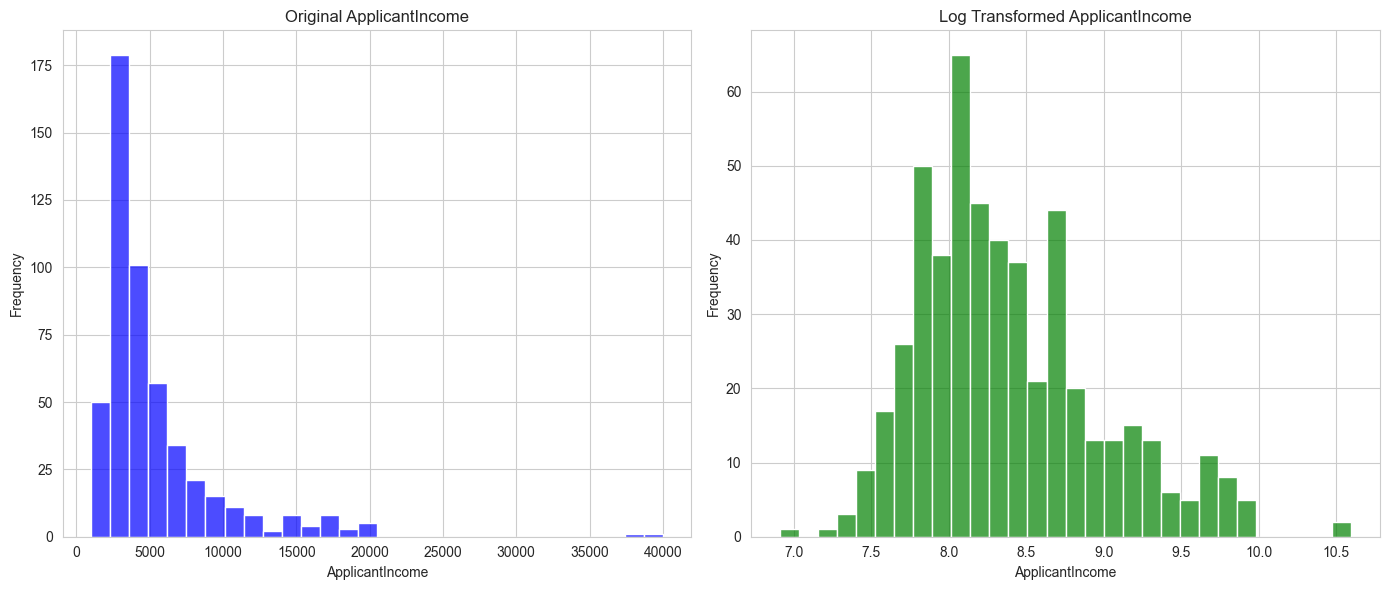

In [67]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data
sns.histplot(train_data_old['ApplicantIncome'], bins=30, kde=False, color='blue', ax=ax[0], alpha=0.7)
ax[0].set_title('Original ApplicantIncome')
ax[0].set_xlabel('ApplicantIncome')
ax[0].set_ylabel('Frequency')

# After log transformation
sns.histplot(X_train['ApplicantIncome'], bins=30, kde=False, color='green', ax=ax[1], alpha=0.7)
ax[1].set_title('Log Transformed ApplicantIncome')
ax[1].set_xlabel('ApplicantIncome')
ax[1].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

plt.show()

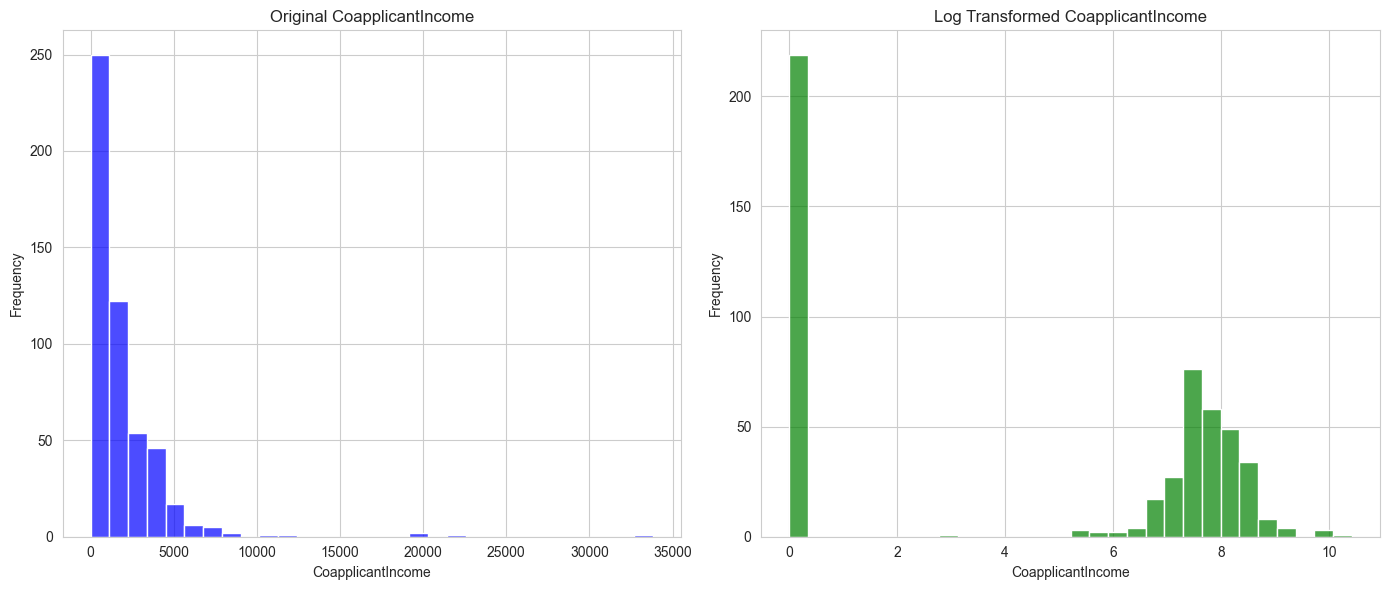

In [68]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data
sns.histplot(train_data_old['CoapplicantIncome'], bins=30, kde=False, color='blue', ax=ax[0], alpha=0.7)
ax[0].set_title('Original CoapplicantIncome')
ax[0].set_xlabel('CoapplicantIncome')
ax[0].set_ylabel('Frequency')

# After log transformation
sns.histplot(X_train['CoapplicantIncome'], bins=30, kde=False, color='green', ax=ax[1], alpha=0.7)
ax[1].set_title('Log Transformed CoapplicantIncome')
ax[1].set_xlabel('CoapplicantIncome')
ax[1].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

plt.show()

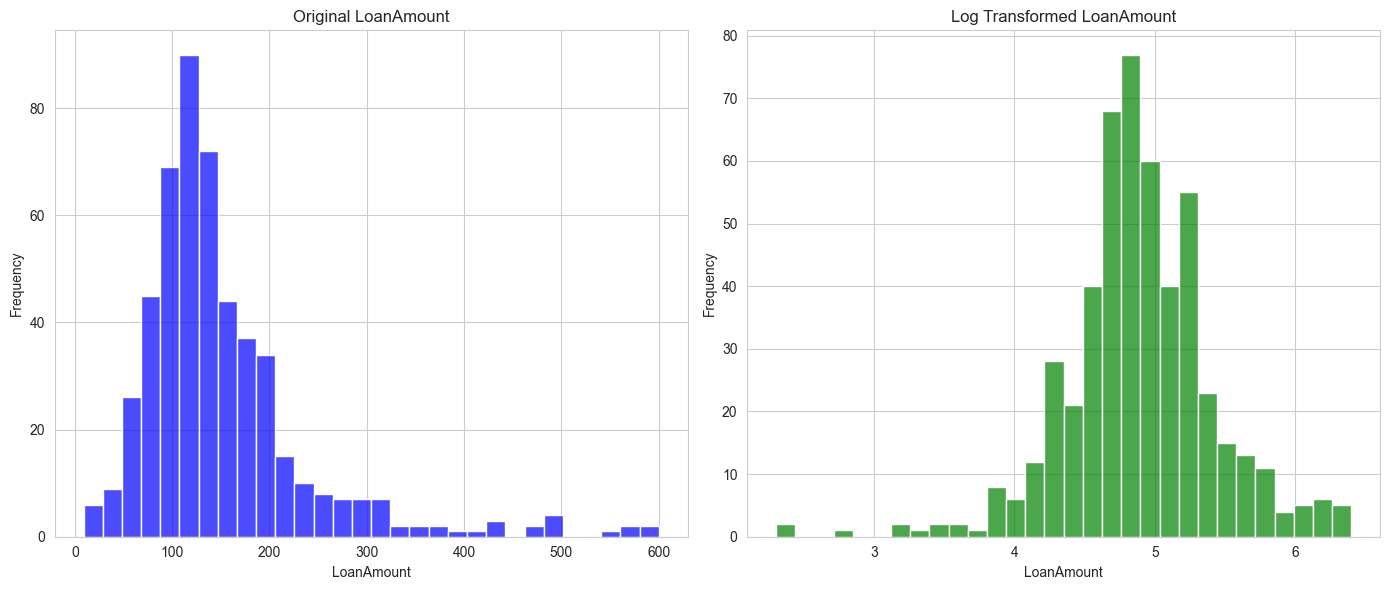

In [70]:
# Set the style for Seaborn plots
sns.set_style("whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data
sns.histplot(train_data_old['LoanAmount'], bins=30, kde=False, color='blue', ax=ax[0], alpha=0.7)
ax[0].set_title('Original LoanAmount')
ax[0].set_xlabel('LoanAmount')
ax[0].set_ylabel('Frequency')

# After log transformation
sns.histplot(X_train['LoanAmount'], bins=30, kde=False, color='green', ax=ax[1], alpha=0.7)
ax[1].set_title('Log Transformed LoanAmount')
ax[1].set_xlabel('LoanAmount')
ax[1].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


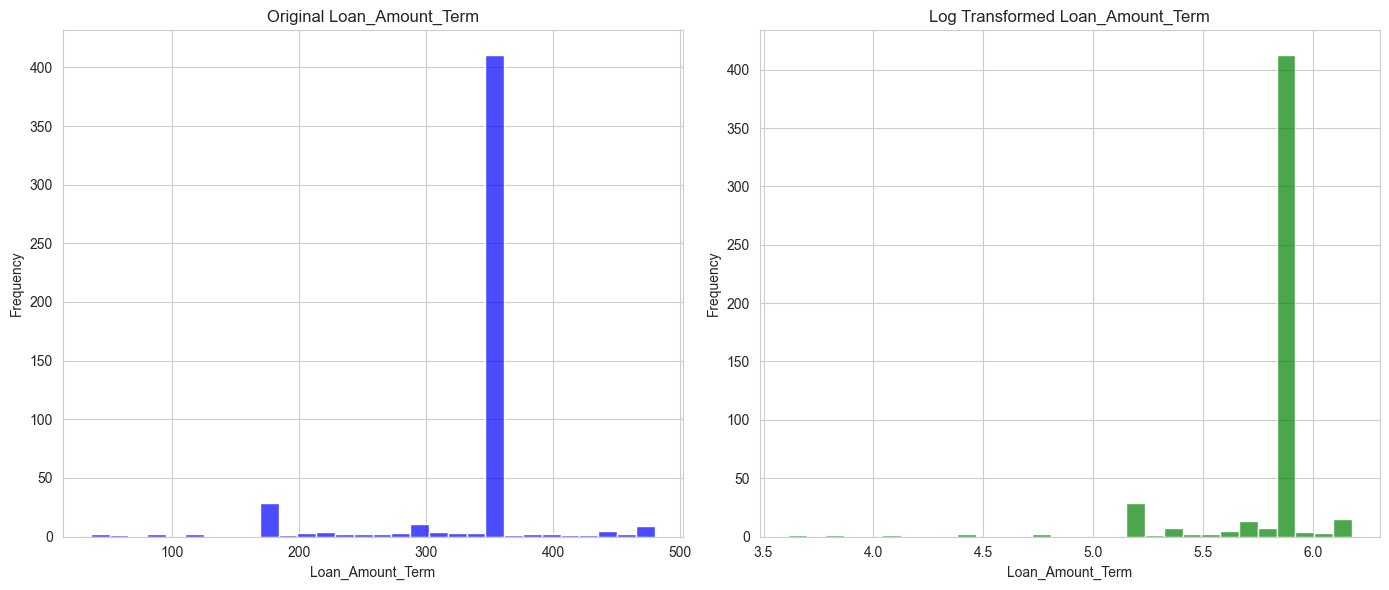

In [71]:
# Set the style for Seaborn plots
sns.set_style("whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data
sns.histplot(train_data_old['Loan_Amount_Term'], bins=30, kde=False, color='blue', ax=ax[0], alpha=0.7)
ax[0].set_title('Original Loan_Amount_Term')
ax[0].set_xlabel('Loan_Amount_Term')
ax[0].set_ylabel('Frequency')

# After log transformation
sns.histplot(X_train['Loan_Amount_Term'], bins=30, kde=False, color='green', ax=ax[1], alpha=0.7)
ax[1].set_title('Log Transformed Loan_Amount_Term')
ax[1].set_xlabel('Loan_Amount_Term')
ax[1].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

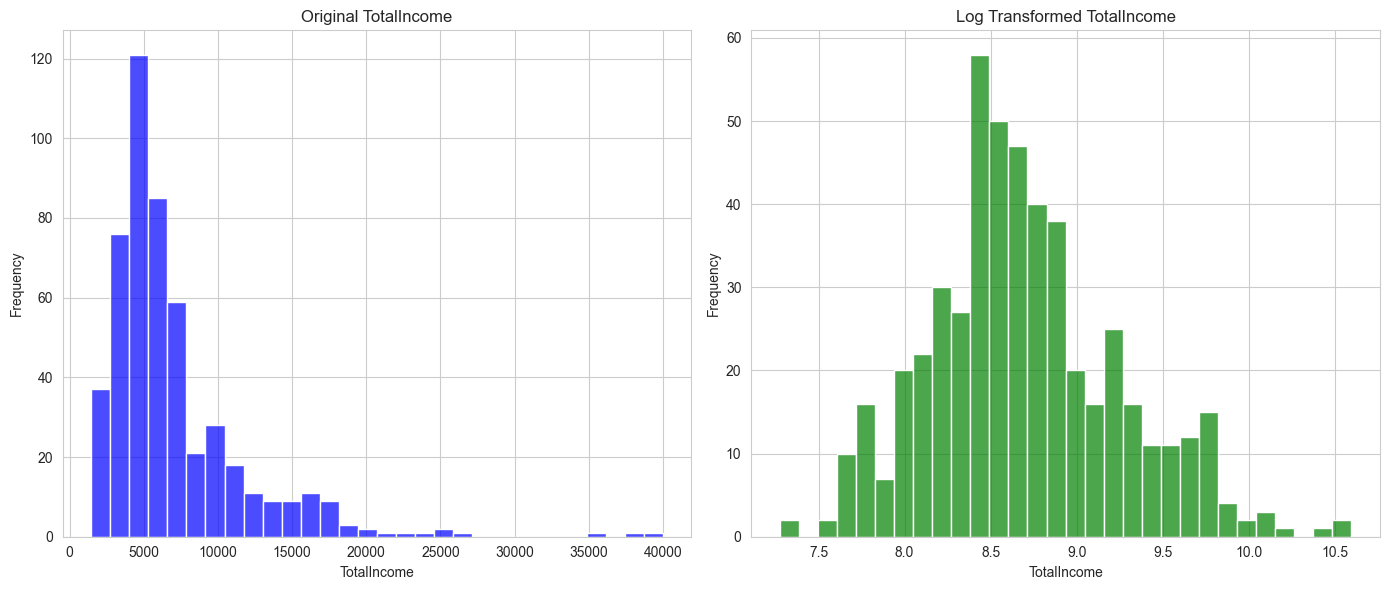

In [72]:
# Set the style for Seaborn plots
sns.set_style("whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data
sns.histplot(train_data_old['TotalIncome'], bins=30, kde=False, color='blue', ax=ax[0], alpha=0.7)
ax[0].set_title('Original TotalIncome')
ax[0].set_xlabel('TotalIncome')
ax[0].set_ylabel('Frequency')

# After log transformation
sns.histplot(X_train['TotalIncome'], bins=30, kde=False, color='green', ax=ax[1], alpha=0.7)
ax[1].set_title('Log Transformed TotalIncome')
ax[1].set_xlabel('TotalIncome')
ax[1].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


After the log transformation, data are less skewed and more normalized

In [73]:
X_train.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,TotalIncome
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.781496,0.531496,0.779528,0.118110,8.381055,4.401392,4.883630,5.816732,0.766539,0.960630,0.596457,8.690978
std,0.413638,0.499499,0.414974,0.323057,0.587085,3.875447,0.531502,0.263273,0.396514,0.760479,0.912626,0.552575
min,0.000000,0.000000,0.000000,0.000000,6.908755,0.000000,2.302585,3.610918,0.000000,0.000000,0.000000,7.274480
25%,1.000000,0.000000,1.000000,0.000000,7.972552,0.000000,4.628644,5.888878,0.685421,0.000000,0.000000,8.361474
50%,1.000000,1.000000,1.000000,0.000000,8.259328,7.135679,4.859812,5.888878,1.000000,1.000000,0.000000,8.620558
75%,1.000000,1.000000,1.000000,0.000000,8.710825,7.760248,5.198497,5.888878,1.000000,2.000000,1.000000,8.984474
max,1.000000,1.000000,1.000000,1.000000,10.596635,10.429340,6.398595,6.175867,1.000000,2.000000,3.000000,10.596635


In [74]:
X_test.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,TotalIncome
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.808333,0.691667,0.716667,0.116667,8.296761,4.310578,4.828360,5.770446,0.866667,0.983333,0.916667,8.636196
std,0.395263,0.463741,0.452506,0.322369,0.743366,3.871160,0.515291,0.372067,0.341360,0.798984,1.073621,0.581512
min,0.000000,0.000000,0.000000,0.000000,5.017280,0.000000,2.890372,3.610918,0.000000,0.000000,0.000000,7.576097
25%,1.000000,0.000000,0.000000,0.000000,7.929656,0.000000,4.615121,5.888878,1.000000,0.000000,0.000000,8.249371
50%,1.000000,1.000000,1.000000,0.000000,8.221072,7.153288,4.867505,5.888878,1.000000,1.000000,0.000000,8.551778
75%,1.000000,1.000000,1.000000,0.000000,8.609760,7.762414,5.101304,5.888878,1.000000,2.000000,2.000000,8.870059
max,1.000000,1.000000,1.000000,1.000000,11.302217,9.302828,6.079933,6.175867,1.000000,2.000000,3.000000,11.302217


Both train, and test set are normalized, and is ready for model training.

In [76]:
X_train = X_train.drop('TotalIncome', axis=1)
X_test = X_test.drop('TotalIncome', axis=1)

In [77]:
X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,1,0,1,0,8.111928,0.000000,4.262680,5.888878,1.0,2,0
1,1,1,1,1,9.224243,0.000000,5.564520,5.888878,1.0,1,3
2,1,0,0,0,8.188411,7.160846,4.615121,5.888878,1.0,0,0
3,0,0,0,0,8.391403,0.000000,4.795791,5.888878,1.0,1,0
4,1,1,0,0,8.160804,6.988413,4.912655,5.888878,1.0,2,1


In [78]:
# Save train and test data
X_train.to_csv('../data/train/X_train.csv', index=False)
X_test.to_csv('../data/test/X_test.csv', index=False)
y_train.to_csv('../data/train/y_train.csv', index=False)
y_test.to_csv('../data/test/y_test.csv', index=False)
